In [ ]:
!pip install openpyxl

In [ ]:
!pip install pandas
!pip install numpy

In [ ]:
import pandas as pd
import numpy as np
import openpyxl

In [ ]:
# read csv
# df_excel= pd.
#df_excel = pd.read_hdf('/content/datos.hdf5',key="Salon")
df_excel =pd.read_parquet('datos.parquet')
# df_excel = pd.read_excel("datos.xlsx")

In [ ]:
df_excel['gender']

0        female
1          male
2          male
3          male
4          male
          ...  
99995      male
99996    female
99997    female
99998    female
99999      male
Name: gender, Length: 100000, dtype: object

# Crea un columa

In [ ]:
# Crea un columa auto increntable
df_excel.reset_index(level=0, inplace=True)


In [ ]:
df_excel

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,free/reduced,none,42,73,62
1,1,male,group B,some high school,standard,none,67,85,30
2,2,male,group D,some college,standard,completed,83,86,58
3,3,male,group B,bachelor's degree,free/reduced,completed,98,37,15
4,4,male,group B,some high school,standard,completed,70,82,88
...,...,...,...,...,...,...,...,...,...
99995,99995,male,group C,some high school,free/reduced,completed,4,57,31
99996,99996,female,group B,master's degree,standard,completed,93,25,27
99997,99997,female,group C,some high school,standard,none,53,49,0
99998,99998,female,group B,associate's degree,standard,completed,59,67,68


# Sum, Average, Max, Min, Count

## Columns

In [ ]:
# first look
df_excel.describe()

,index,math score,reading score,writing score
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,49999.500000,50.185390,49.876620,49.97523
std,28867.657797,29.138891,29.113146,29.13746
min,0.000000,0.000000,0.000000,0.00000
25%,24999.750000,25.000000,25.000000,25.00000
50%,49999.500000,50.000000,50.000000,50.00000
75%,74999.250000,76.000000,75.000000,75.00000
max,99999.000000,100.000000,100.000000,100.00000


In [ ]:
# calculate specific columns

df_excel['math score'].sum()
# df_excel['math score'].mean()
# df_excel['math score'].max()
# df_excel['math score'].min()
# df_excel['math score'].count()


5018539

# Rows

In [ ]:
df_excel['average'] = (df_excel['math score'] + df_excel['reading score'] + df_excel['writing score'])/3
# df_excel.mean(axis=1)
df_excel.head(10)

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,0,female,group B,bachelor's degree,free/reduced,none,42,73,62,59.000000
1,1,male,group B,some high school,standard,none,67,85,30,60.666667
2,2,male,group D,some college,standard,completed,83,86,58,75.666667
3,3,male,group B,bachelor's degree,free/reduced,completed,98,37,15,50.000000
4,4,male,group B,some high school,standard,completed,70,82,88,80.000000
5,5,male,group A,some college,standard,none,4,33,24,20.333333
6,6,male,group E,high school,free/reduced,none,23,62,24,36.333333
7,7,female,group A,master's degree,standard,completed,85,13,2,33.333333
8,8,female,group C,associate's degree,free/reduced,completed,97,27,43,55.666667
9,9,male,group B,master's degree,standard,none,13,22,92,42.333333


In [ ]:
# count
df_excel['gender'].value_counts()

female    50161
male      49839
Name: gender, dtype: int64

# IF

In [ ]:
# if condition
df_excel['pass/fail'] = np.where(df_excel['average'] > 70, 'Pass', 'Fail')
df_excel.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail
0,0,female,group B,bachelor's degree,free/reduced,none,42,73,62,59.000000,Fail
1,1,male,group B,some high school,standard,none,67,85,30,60.666667,Fail
2,2,male,group D,some college,standard,completed,83,86,58,75.666667,Pass
3,3,male,group B,bachelor's degree,free/reduced,completed,98,37,15,50.000000,Fail
4,4,male,group B,some high school,standard,completed,70,82,88,80.000000,Pass


In [ ]:
# multiple conditions
conditions = [
    (df_excel['average']>=90),
    (df_excel['average']>=80) & (df_excel['average']<90),
    (df_excel['average']>=70) & (df_excel['average']<80),
    (df_excel['average']>=60) & (df_excel['average']<70),
    (df_excel['average']>=50) & (df_excel['average']<60),
    (df_excel['average']<50),
]

values = ['A', 'B', 'C', 'D', 'E', 'F']

In [ ]:
df_excel['grades'] = np.select(conditions, values)
df_excel.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,0,female,group B,bachelor's degree,free/reduced,none,42,73,62,59.000000,Fail,E
1,1,male,group B,some high school,standard,none,67,85,30,60.666667,Fail,D
2,2,male,group D,some college,standard,completed,83,86,58,75.666667,Pass,C
3,3,male,group B,bachelor's degree,free/reduced,completed,98,37,15,50.000000,Fail,E
4,4,male,group B,some high school,standard,completed,70,82,88,80.000000,Pass,B


In [ ]:
# show first 5 rows
df_excel[['average', 'pass/fail', 'grades']].head()

,average,pass/fail,grades
0,59.000000,Fail,E
1,60.666667,Fail,D
2,75.666667,Pass,C
3,50.000000,Fail,E
4,80.000000,Pass,B


# SumIf, CountIf, AverageIf

## One condition (select a column with brackets [ ] )

In [ ]:
# only sum scores for the female gender
df_female = df_excel[df_excel['gender'] == 'female']
# df_female['sum'] = df_female.sum(axis=1)

## Two or more conditions (select columns and use & or |)

In [ ]:
# solo obtener el promedio para el genero femenino y grupo B
df_sumifs = df_excel[(df_excel['gender'] == 'female') & (df_excel['race/ethnicity'] == 'group B')]
df_sumifs = df_sumifs.assign(sumifs = df_sumifs['math score'] + df_sumifs['reading score'] + df_sumifs['writing score'])
df_sumifs

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades,sumifs
0,0,female,group B,bachelor's degree,free/reduced,none,42,73,62,59.000000,Fail,E,177
25,25,female,group B,high school,standard,none,46,100,0,48.666667,Fail,F,146
34,34,female,group B,some college,standard,none,59,2,30,30.333333,Fail,F,91
37,37,female,group B,high school,standard,none,81,54,26,53.666667,Fail,E,161
42,42,female,group B,some high school,free/reduced,none,71,45,24,46.666667,Fail,F,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99958,99958,female,group B,some high school,free/reduced,completed,6,38,76,40.000000,Fail,F,120
99976,99976,female,group B,associate's degree,standard,none,16,81,40,45.666667,Fail,F,137
99984,99984,female,group B,high school,standard,completed,97,18,36,50.333333,Fail,E,151
99996,99996,female,group B,master's degree,standard,completed,93,25,27,48.333333,Fail,F,145


# Basic Data Cleaning

## Change the case of text with .str.lower, .str.upper or .str.title

In [ ]:
# df_excel['gender'].str.title()
# df_excel['gender'].str.upper()
df_excel['gender'].str.title()

0        Female
1          Male
2          Male
3          Male
4          Male
          ...  
99995      Male
99996    Female
99997    Female
99998    Female
99999      Male
Name: gender, Length: 100000, dtype: object

## Extract text in a column with .str.extract

In [ ]:
df_excel['race/ethnicity'].str.extract(r'([A-Z])')

,0
0,B
1,B
2,D
3,B
4,B
...,...
99995,C
99996,B
99997,C
99998,B


## Identify whether a cell is empty with the .isnull method

In [ ]:
# there's no empty rows in the dataframe
df_excel[df_excel['gender'].isnull()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades


## Find an element with .loc[ ]

In [ ]:
df_excel.loc[100, ]

level_0                                       100
index                                         100
gender                                       male
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                    standard
test preparation course                      none
math score                                     85
reading score                                  20
writing score                                  63
average                                      56.0
pass/fail                                    Fail
grades                                          E
Name: 100, dtype: object

In [ ]:
df_excel.loc[df_excel['index']==10, 'math score']

10    73
Name: math score, dtype: int64

## Use the .pivot_table method

In [ ]:
df_pivot = df_excel.pivot_table(index='race/ethnicity', values=['math score', 'writing score'], aggfunc='mean')
df_pivot

,math score,writing score
race/ethnicity,,
group A,50.647018,49.966752
group B,49.807854,49.963208
group C,50.101450,50.304896
group D,49.970106,49.724378
group E,50.397790,49.915413


# Replace Excel Graphs with Python's Matplotlib or Seaborn

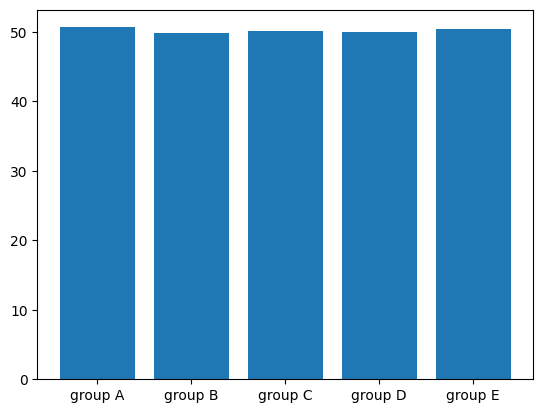

In [ ]:
import matplotlib.pyplot as plt

df_plot = df_pivot.reset_index()
plt.bar(df_plot['race/ethnicity'], df_plot['math score'])
plt.show()

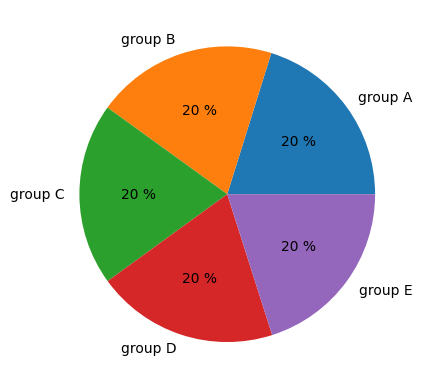

In [ ]:
plt.pie(df_plot['math score'], labels=df_plot['race/ethnicity'], autopct='%.0f %%')
plt.show()